In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [20]:
bias =100
X,y,coef = make_regression(n_features=1,bias=bias,noise = 10,random_state=42,coef=True)

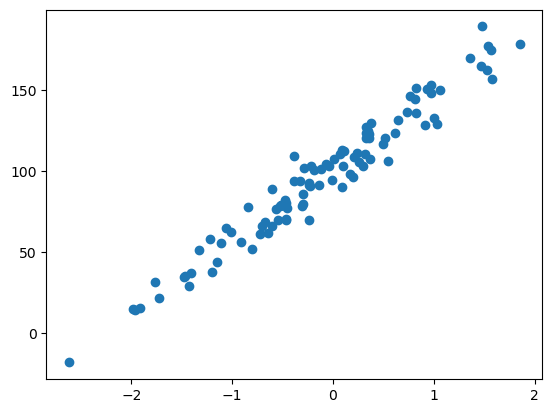

In [17]:
plt.scatter(x = X,y=y)

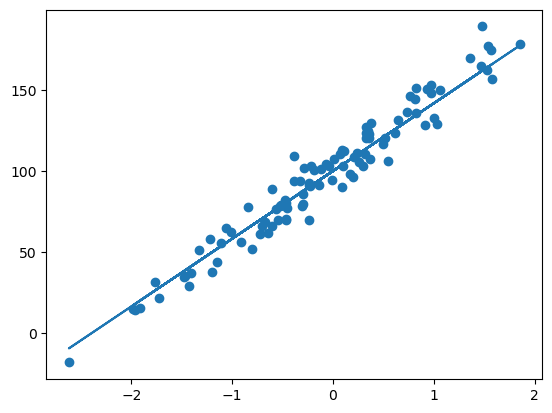

In [34]:
plt.scatter(x = X,y=y)
y_gen = coef*X+ bias
plt.plot(X,y_gen)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [28]:
model.fit(X,y)

LinearRegression()

In [31]:
model.coef_,model.intercept_

(array([44.43716999]), 101.165115320527)

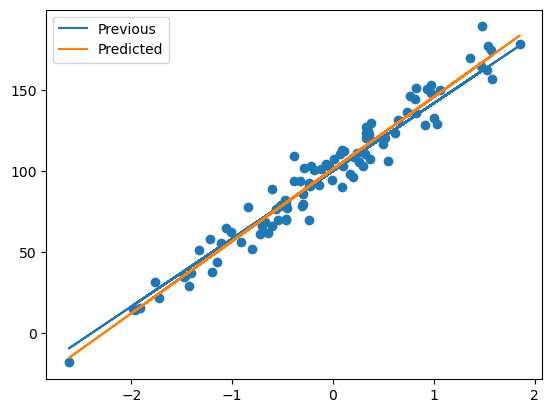

In [38]:
plt.scatter(X,y)
plt.plot(X,y_gen,label = "Previous")
plt.plot(X,model.predict(X),label = "Predicted")
plt.legend()

# Custom Linear Regression

In [52]:
class CustomLR:
    def __init__(self,lr=0.1):
        self.lr = lr
    def fit(self,X,y):
        self._X = X
        self._y = y.reshape(-1,1)
        
        #Taking random values for coefficient and intercept
        self.coefficient_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        # Perform gradient descent for n iterations
        for i in range(50):
            self.gradient_descend()
            errors.append(self.error())
        return errors
    def error(self):
        return ((self._y - (self.coefficient_*self._X + self.intercept_))**2).mean()
    
    def gradient_descend(self):
        d_coeff, d_bias = self.gradient()
        self.coefficient_ -= self.lr*d_coeff
        self.intercept_ -= self.lr*d_bias
        
    def gradient(self):
        yh = self.predict(self._X)
        d_coeff  = (2*(yh-self._y)*self._X).mean()
        d_bias = (2*(yh - self._y)).mean()
        return d_coeff,d_bias
    def predict(self,X):
        return self.coefficient_*X+self.intercept_
    
    
        

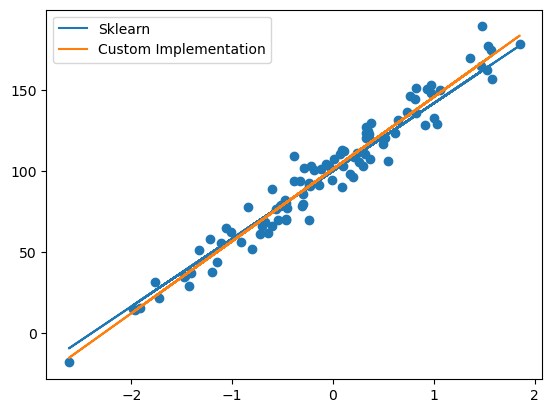

In [58]:
model = CustomLR(0.1)
model.fit(X,y)
plt.scatter(X,y)
plt.plot(X,y_gen,label = "Sklearn")

plt.plot(X,model.predict(X),label = "Custom Implementation")
plt.legend()


In [55]:
model.coefficient_,model.intercept_

(44.421650284284695, 101.15722042632827)